In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker as mticker
from matplotlib.patches import Patch

### Prepare data

In [2]:
# ================== 随机森林 ==================
rf_data = {
    "Lag": [0,1,2,3,4],
    "Train_MSE": [40.44,46.84,32.77,40.51,41.92],
    "Test_MSE": [80.83,82.18,69.90,78.64,81.87],
    "Train_MAPE": [0.05,0.06,0.05,0.05,0.06],
    "Test_MAPE": [0.07,0.08,0.07,0.07,0.07],
    "Train_MAE": [4.49,4.95,4.05,4.51,4.70],
    "Test_MAE": [5.97,6.56,5.98,6.11,6.29],
    "Train_R2": [0.69,0.60,0.72,0.66,0.64],
    "Test_R2": [0.41,0.34,0.44,0.37,0.35],
    "Features": [
        ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','HGVs_4_or_more_rigid_axle']
    ]*5
}
rf_df = pd.DataFrame(rf_data)
rf_df["Model"] = "RandomForest"

# ================== DNN ==================
dnn_data = {
    "Lag": [0,1,2,3,4],
    "Train_MSE": [76.56,70.84,70.86,69.66,70.52],
    "Test_MSE": [80.33,75.54,76.54,73.91,75.00],
    "Train_MAPE": [0.0693,0.0675,0.0678,0.0665,0.0676],
    "Test_MAPE": [0.0717,0.0694,0.0699,0.0681,0.0695],
    "Train_MAE": [6.1294,5.9948,6.0474,5.9639,6.0117],
    "Test_MAE": [6.3324,6.1774,6.2435,6.0987,6.1770],
    "Train_R2": [0.578,0.5745,0.5745,0.5818,0.577],
    "Test_R2": [0.5604,0.5517,0.5435,0.5637,0.5552],
    "Features": [
        ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','buses_and_coaches','LGVs','HGVs_4_or_more_rigid_axle']
    ]*5
}
dnn_df = pd.DataFrame(dnn_data)
dnn_df["Model"] = "DNN"

# ================== K近邻 ==================
knn_features = [
    ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','local_authority_name_encoded','HGVs_4_or_more_rigid_axle','LGVs'],
    ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','local_authority_name_encoded','LGVs','HGVs_4_or_more_rigid_axle','pedal_cycles'],
    ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','LGVs','HGVs_4_or_more_rigid_axle','local_authority_name_encoded','pedal_cycles'],
    ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','local_authority_name_encoded','HGVs_4_or_more_rigid_axle','LGVs'],
    ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','local_authority_name_encoded','LGVs','HGVs_4_or_more_rigid_axle']
]

knn_data = {
    "Lag": [0,1,2,3,4],
    "Train_MSE": [26.26,25.76,25.21,23.63,23.05],
    "Test_MSE": [49.58,46.63,37.80,47.95,48.98],
    "Train_MAPE": [0.0449,0.0465,0.046,0.0438,0.0437],
    "Test_MAPE": [0.064,0.0595,0.0585,0.0605,0.0605],
    "Train_MAE": [3.7624,3.8823,3.8226,3.6366,3.6524],
    "Test_MAE": [5.4079,5.0865,4.9068,5.1256,5.148],
    "Train_R2": [0.8029,0.7832,0.7879,0.8011,0.806],
    "Test_R2": [0.622,0.6096,0.6835,0.5985,0.5898],
    "Features": knn_features
}
knn_df = pd.DataFrame(knn_data)
knn_df["Model"] = "KNN"

# ================== XGBoost ==================
xgb_data = {
    "Lag": [0,1,2,3,4],
    "Train_MSE": [2.70,2.89,2.67,2.55,2.64],
    "Test_MSE": [52.51,49.53,40.12,49.90,51.53],
    "Train_MAPE": [0.0145,0.0146,0.0142,0.014,0.014],
    "Test_MAPE": [0.0573,0.0499,0.0516,0.0536,0.0541],
    "Train_MAE": [1.20,1.22,1.19,1.17,1.17],
    "Test_MAE": [4.84,4.36,4.42,4.58,4.67],
    "Train_R2": [0.98,0.98,0.98,0.98,0.98],
    "Test_R2": [0.60,0.59,0.66,0.58,0.57],
    "Features": [
        ['HGVs_3_or_4_articulated_axle','HGVs_6_articulated_axle','HGVs_2_rigid_axle','buses_and_coaches','LGVs','HGVs_4_or_more_rigid_axle']
    ]*5
}
xgb_df = pd.DataFrame(xgb_data)
xgb_df["Model"] = "XGBoost"

# ================== 贝叶斯回归 ==================
bayesian_df = {
    "Lag": [0,1,2,3,4],
    "Train_MSE": [110.07, 111.73, 105.42, 105.87, 107.1],
    "Test_MSE": [122.54, 122.45, 95.28, 95.62, 99.73],
    "Train_MAPE": [0.10, 0.10, 0.09, 0.09, 0.09],
    "Test_MAPE": [0.10, 0.10, 0.09, 0.09, 0.09],
    "Train_MAE": [8.05, 8.08, 7.82, 7.85, 7.9],
    "Test_MAE": [8.15, 8.15, 7.5, 7.59, 7.76],
    "Train_R2": [0.39, 0.381, 0.361, 0.358, 0.351],
    "Test_R2": [0.334, 0.334, 0.443, 0.441, 0.417],
    "Features": [
        ['two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 
                 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle',
                 'all_HGVs', 'all_motor_vehicles']
    ]*5
}
bayesian_df = pd.DataFrame(bayesian_df)
bayesian_df["Model"] = "BayesianRidge"

# ================== 合并所有数据 ==================
full_combined = pd.concat([rf_df, dnn_df, knn_df, xgb_df, bayesian_df], ignore_index=True)


In [3]:

# ================== 解析线性模型数据 ==================
linear_data = []
features_dict = {
    0: ['HGVs_5_articulated_axle', 'two_wheeled_motor_vehicles', 'pedal_cycles'],
    1: ['HGVs_5_articulated_axle', 'two_wheeled_motor_vehicles', 'pedal_cycles', 'buses_and_coaches'],
    2: ['HGVs_6_articulated_axle', 'two_wheeled_motor_vehicles', 'pedal_cycles', 'buses_and_coaches'],
    3: ['HGVs_6_articulated_axle', 'two_wheeled_motor_vehicles', 'pedal_cycles', 'HGVs_5_articulated_axle'],
    4: ['HGVs_5_articulated_axle', 'two_wheeled_motor_vehicles', 'pedal_cycles', 'HGVs_6_articulated_axle']
}

# 定义lag数据字典
lag_dict = {
    0: {
        'ElasticNet': {'Train_MAE': 10.356243, 'Train_MSE': 167.173441, 'Train_MAPE': 9.636528, 'Test_MAE': 10.211706, 'Test_MSE': 171.967342, 'Test_MAPE': 11.801680, 'Test_R2': 0.065629, 'Train_R2': 0.277268},
        'Ridge': {'Train_MAE': 10.354652, 'Train_MSE': 167.161008, 'Train_MAPE': 9.633315, 'Test_MAE': 10.209916, 'Test_MSE': 171.972896, 'Test_MAPE': 11.789997, 'Test_R2': 0.065599, 'Train_R2': 0.277397},
        'HuberRegressor': {'Train_MAE': 10.346808, 'Train_MSE': 167.186588, 'Train_MAPE': 10.879871, 'Test_MAE': 10.189935, 'Test_MSE': 172.004739, 'Test_MAPE': 11.731443, 'Test_R2': 0.065426, 'Train_R2': 0.219986}
    },
    1: {
        'Ridge': {'Train_MAE': 9.546057, 'Train_MSE': 145.286695, 'Train_MAPE': 10.962564, 'Test_MAE': 9.806309, 'Test_MSE': 148.200222, 'Test_MAPE': 11.792153, 'Test_R2': 0.133640, 'Train_R2': 0.222754},
        'ElasticNet': {'Train_MAE': 9.546728, 'Train_MSE': 145.290482, 'Train_MAPE': 10.977140, 'Test_MAE': 9.807754, 'Test_MSE': 148.237992, 'Test_MAPE': 11.807524, 'Test_R2': 0.133419, 'Train_R2': 0.222128},
        'HuberRegressor': {'Train_MAE': 9.535648, 'Train_MSE': 145.537942, 'Train_MAPE': 10.886236, 'Test_MAE': 9.810154, 'Test_MSE': 148.741745, 'Test_MAPE': 11.697456, 'Test_R2': 0.130475, 'Train_R2': 0.221812}
    },
    2: {
        'Ridge': {'Train_MAE': 9.801117, 'Train_MSE': 152.736995, 'Train_MAPE': 10.431238, 'Test_MAE': 10.139066, 'Test_MSE': 157.616919, 'Test_MAPE': 11.255638, 'Test_R2': 0.078591, 'Train_R2': 0.270129},
        'ElasticNet': {'Train_MAE': 9.802303, 'Train_MSE': 152.743337, 'Train_MAPE': 10.431926, 'Test_MAE': 10.140291, 'Test_MSE': 157.662447, 'Test_MAPE': 11.255997, 'Test_R2': 0.078325, 'Train_R2': 0.270126},
        'HuberRegressor': {'Train_MAE': 9.799081, 'Train_MSE': 152.739739, 'Train_MAPE': 10.347405, 'Test_MAE': 10.144221, 'Test_MSE': 157.694927, 'Test_MAPE': 11.076411, 'Test_R2': 0.078135, 'Train_R2': 0.266931}
    },
    3: {
        'Ridge': {'Train_MAE': 9.018259, 'Train_MSE': 132.739741, 'Train_MAPE': 10.207088, 'Test_MAE': 9.469678, 'Test_MSE': 139.218193, 'Test_MAPE': 11.102577, 'Test_R2': 0.186148, 'Train_R2': 0.279720},
        'ElasticNet': {'Train_MAE': 9.019081, 'Train_MSE': 132.745234, 'Train_MAPE': 10.207279, 'Test_MAE': 9.471385, 'Test_MSE': 139.262335, 'Test_MAPE': 11.103290, 'Test_R2': 0.185890, 'Train_R2': 0.279718},
        'HuberRegressor': {'Train_MAE': 9.004187, 'Train_MSE': 133.028284, 'Train_MAPE': 10.167523, 'Test_MAE': 9.491881, 'Test_MSE': 140.207012, 'Test_MAPE': 10.875791, 'Test_R2': 0.180368, 'Train_R2': 0.275953}
    },
    4: {
        'Ridge': {'Train_MAE': 9.034370, 'Train_MSE': 133.010379, 'Train_MAPE': 9.633315, 'Test_MAE': 9.474463, 'Test_MSE': 140.066504, 'Test_MAPE': 10.810463, 'Test_R2': 0.181189, 'Train_R2': 0.277397},
        'ElasticNet': {'Train_MAE': 9.037221, 'Train_MSE': 133.035219, 'Train_MAPE': 9.636528, 'Test_MAE': 9.480327, 'Test_MSE': 140.248533, 'Test_MAPE': 10.811376, 'Test_R2': 0.180125, 'Train_R2': 0.277268},
        'HuberRegressor': {'Train_MAE': 9.026354, 'Train_MSE': 133.279846, 'Train_MAPE': 9.537341, 'Test_MAE': 9.486530, 'Test_MSE': 141.036481, 'Test_MAPE': 10.741072, 'Test_R2': 0.175519, 'Train_R2': 0.272465}
    }
}

# 构建线性模型DataFrame
for lag in range(5):
    for model in ['ElasticNet', 'Ridge', 'HuberRegressor']:
        data = {
            "Model": model,
            "Lag": lag,
            "Train_MAE": lag_dict[lag][model]['Train_MAE'],
            "Train_MSE": lag_dict[lag][model]['Train_MSE'],
            "Test_MAE": lag_dict[lag][model]['Test_MAE'],
            "Test_MSE": lag_dict[lag][model]['Test_MSE'],
            "Test_R2": lag_dict[lag][model]['Test_R2'],
            "Features": [features_dict[lag]],
            "Train_MAPE": lag_dict[lag][model]['Train_MAPE'],
            "Test_MAPE": lag_dict[lag][model]['Test_MAPE'], 
            "Train_R2": lag_dict[lag][model]['Train_R2'],
        }
        linear_data.append(pd.DataFrame([data]))

linear_df = pd.concat(linear_data, ignore_index=True)


# ================== 合并到现有数据 ==================
# 确保列顺序一致
column_order = [
    'Model', 'Lag', 'Train_MSE', 'Test_MSE',
    'Train_MAE', 'Test_MAE', 'Train_MAPE',
    'Test_MAPE', 'Train_R2', 'Test_R2', 'Features'
]

# 合并数据
full_combined = pd.concat([full_combined[column_order], linear_df[column_order]], ignore_index=True)

# ================== 验证数据 ==================
# print("合并后的数据维度:", full_combined.shape)
# print("\n模型分布:\n", full_combined['Model'].value_counts())
# print("\nLag=3的示例数据:\n", full_combined[full_combined.Lag == 3].head(2))

In [22]:
# 筛选每个模型在Lag 0-4中Test MSE最小（最佳表现）的行
min_test_mse = full_combined.groupby('Model')['Test_MSE'].idxmin()  # 关键修改点：idxmax() → idxmin()
subset = full_combined.loc[min_test_mse]

# 按Test MSE升序排序（最佳表现中相对更好的排前面）
subset = subset.sort_values(by='Test_MSE', ascending=True)

# only model, lag, test mse, test mape, test mae, test r2
subset = subset[['Model', 'Lag', 'Test_MSE', 'Test_MAPE', 'Test_MAE', 'Test_R2']]

subset


,Model,Lag,Test_MSE,Test_MAPE,Test_MAE,Test_R2
12,KNN,2,37.800000,0.058500,4.906800,0.683500
17,XGBoost,2,40.120000,0.051600,4.420000,0.660000
2,RandomForest,2,69.900000,0.070000,5.980000,0.440000
8,DNN,3,73.910000,0.068100,6.098700,0.563700
22,BayesianRidge,2,95.280000,0.090000,7.500000,0.443000
35,Ridge,3,139.218193,11.102577,9.469678,0.186148
34,ElasticNet,3,139.262335,11.103290,9.471385,0.185890
36,HuberRegressor,3,140.207012,10.875791,9.491881,0.180368


In [26]:
min_test_r2 = full_combined.groupby('Model')['Test_R2'].idxmin() 
subset_r2 = full_combined.loc[min_test_r2]

subset_r2 = subset.sort_values(by='Test_R2', ascending=False)

# only model, lag, test mse, test mape, test mae, test r2
subset_r2 = subset_r2[['Model', 'Lag', 'Test_R2', 'Test_MSE', 'Test_MAPE', 'Test_MAE']]

subset_r2

,Model,Lag,Test_R2,Test_MSE,Test_MAPE,Test_MAE
12,KNN,2,0.683500,37.800000,0.058500,4.906800
17,XGBoost,2,0.660000,40.120000,0.051600,4.420000
8,DNN,3,0.563700,73.910000,0.068100,6.098700
22,BayesianRidge,2,0.443000,95.280000,0.090000,7.500000
2,RandomForest,2,0.440000,69.900000,0.070000,5.980000
35,Ridge,3,0.186148,139.218193,11.102577,9.469678
34,ElasticNet,3,0.185890,139.262335,11.103290,9.471385
36,HuberRegressor,3,0.180368,140.207012,10.875791,9.491881


In [28]:
min_test_mae = full_combined.groupby('Model')['Test_MAE'].idxmin() 
subset_mae = full_combined.loc[min_test_mae]

subset_mae = subset.sort_values(by='Test_MAE', ascending=True)

# only model, lag, test mse, test mape, test mae, test r2
subset_mae = subset_mae[['Model', 'Lag', 'Test_MAE', 'Test_R2', 'Test_MSE', 'Test_MAPE']]

subset_mae

,Model,Lag,Test_MAE,Test_R2,Test_MSE,Test_MAPE
17,XGBoost,2,4.420000,0.660000,40.120000,0.051600
12,KNN,2,4.906800,0.683500,37.800000,0.058500
2,RandomForest,2,5.980000,0.440000,69.900000,0.070000
8,DNN,3,6.098700,0.563700,73.910000,0.068100
22,BayesianRidge,2,7.500000,0.443000,95.280000,0.090000
35,Ridge,3,9.469678,0.186148,139.218193,11.102577
34,ElasticNet,3,9.471385,0.185890,139.262335,11.103290
36,HuberRegressor,3,9.491881,0.180368,140.207012,10.875791


In [29]:
min_test_mape = full_combined.groupby('Model')['Test_MAPE'].idxmin() 
subset_mape = full_combined.loc[min_test_mape]

subset_mape = subset.sort_values(by='Test_MAPE', ascending=True)

# only model, lag, test mse, test mape, test mae, test r2
subset_mape = subset_mape[['Model', 'Lag', 'Test_MAE', 'Test_R2', 'Test_MSE', 'Test_MAPE']]

subset_mape

,Model,Lag,Test_MAE,Test_R2,Test_MSE,Test_MAPE
17,XGBoost,2,4.420000,0.660000,40.120000,0.051600
12,KNN,2,4.906800,0.683500,37.800000,0.058500
8,DNN,3,6.098700,0.563700,73.910000,0.068100
2,RandomForest,2,5.980000,0.440000,69.900000,0.070000
22,BayesianRidge,2,7.500000,0.443000,95.280000,0.090000
36,HuberRegressor,3,9.491881,0.180368,140.207012,10.875791
35,Ridge,3,9.469678,0.186148,139.218193,11.102577
34,ElasticNet,3,9.471385,0.185890,139.262335,11.103290


In [5]:
# models in full_combined
print(full_combined['Model'].unique())

['RandomForest' 'DNN' 'KNN' 'XGBoost' 'BayesianRidge' 'ElasticNet' 'Ridge'
 'HuberRegressor']


In [6]:
# show full_combined but not Features
full_combined_no_features = full_combined.drop(columns=['Features'])
full_combined_no_features

,Model,Lag,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_MAPE,Test_MAPE,Train_R2,Test_R2
0,RandomForest,0,40.440000,80.830000,4.490000,5.970000,0.050000,0.070000,0.690000,0.410000
1,RandomForest,1,46.840000,82.180000,4.950000,6.560000,0.060000,0.080000,0.600000,0.340000
2,RandomForest,2,32.770000,69.900000,4.050000,5.980000,0.050000,0.070000,0.720000,0.440000
3,RandomForest,3,40.510000,78.640000,4.510000,6.110000,0.050000,0.070000,0.660000,0.370000
4,RandomForest,4,41.920000,81.870000,4.700000,6.290000,0.060000,0.070000,0.640000,0.350000
5,DNN,0,76.560000,80.330000,6.129400,6.332400,0.069300,0.071700,0.578000,0.560400
6,DNN,1,70.840000,75.540000,5.994800,6.177400,0.067500,0.069400,0.574500,0.551700
7,DNN,2,70.860000,76.540000,6.047400,6.243500,0.067800,0.069900,0.574500,0.543500
8,DNN,3,69.660000,73.910000,5.963900,6.098700,0.066500,0.068100,0.581800,0.563700
9,DNN,4,70.520000,75.000000,6.011700,6.177000,0.067600,0.069500,0.577000,0.555200


In [7]:
# all available seaborn styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [8]:
# mape data
mape_data = full_combined_no_features[['Model', 'Lag', 'Test_MAPE', 'Train_MAPE']]
mape_data

,Model,Lag,Test_MAPE,Train_MAPE
0,RandomForest,0,0.070000,0.050000
1,RandomForest,1,0.080000,0.060000
2,RandomForest,2,0.070000,0.050000
3,RandomForest,3,0.070000,0.050000
4,RandomForest,4,0.070000,0.060000
5,DNN,0,0.071700,0.069300
6,DNN,1,0.069400,0.067500
7,DNN,2,0.069900,0.067800
8,DNN,3,0.068100,0.066500
9,DNN,4,0.069500,0.067600


In [9]:
# =====================
# 可视化配置
# =====================
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 8,
    'axes.titlesize': 9,
    'axes.labelsize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    'axes.linewidth': 0.5,
    'grid.alpha': 0.2,
    'pdf.fonttype': 42
})

# 颜色配置（色盲友好调色板）
lag_palette = {
    0: '#4C72B0',  # 蓝色
    1: '#55A868',  # 绿色
    2: '#C44E52',  # 红色
    3: '#8172B3',  # 紫色
    4: '#CCB974'   # 金色
}

# 图案配置（区分训练/测试）
hatch_patterns = {
    'Train': '',
    'Test': 'XXX'
}

In [10]:
# =====================
# 数据预处理
# =====================
model_order = [
    'KNN', 'XGBoost', 'DNN', 'RandomForest',
    'BayesianRidge', 'ElasticNet', 'Ridge', 'HuberRegressor'
]
metrics = ['MSE', 'MAE', 'MAPE', 'R2']

# 转换数据类型
dtype_mapping = {col: 'float32' for col in full_combined_no_features.columns if col not in ['Model', 'Lag']}
processed_df = full_combined_no_features.astype(dtype_mapping)

# 重塑数据
melt_df = pd.melt(
    processed_df,
    id_vars=["Model", "Lag"],
    value_vars=[f"Train_{m}" for m in metrics] + [f"Test_{m}" for m in metrics],
    var_name="Metric_Type",
    value_name="Value"
)
melt_df[["Dataset", "Metric"]] = melt_df["Metric_Type"].str.split("_", expand=True)
melt_df["Metric"] = pd.Categorical(melt_df["Metric"], categories=metrics, ordered=True)
melt_df["Model"] = pd.Categorical(melt_df["Model"], categories=model_order, ordered=True)


In [20]:

# # =====================
# # 可视化配置
# # =====================
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.rcParams.update({
#     'font.family': 'DejaVu Sans',
#     'font.size': 8,
#     'axes.titlesize': 9,
#     'axes.labelsize': 8,
#     'xtick.labelsize': 7,
#     'ytick.labelsize': 7,
#     'legend.fontsize': 7,
#     'axes.linewidth': 0.5,
#     'grid.alpha': 0.2,
#     'pdf.fonttype': 42  # 确保字体嵌入
# })

# # 创建画布并调整基础尺寸
# fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # 增大画布尺寸
# axs = axs.flatten()

# # =====================
# # 核心绘图函数（已修复布局问题）
# # =====================
# def plot_metric(ax, metric):
#     # 获取数据
#     metric_df = melt_df[melt_df.Metric == metric]
#     bar_width = 0.35
#     space = 0.15
    
#     # 计算模型基础位置
#     model_spacing = 1.5  # 模型间距
#     x_base = np.arange(len(model_order)) * (5*(bar_width*2 + space) + model_spacing)
    
#     # 绘制每个模型
#     for model_idx, model in enumerate(model_order):
#         model_data = metric_df[metric_df.Model == model]
        
#         # 计算每个lag的位置
#         lag_positions = x_base[model_idx] + np.arange(5) * (bar_width*2 + space)
        
#         # 训练和测试值
#         train_vals = model_data[model_data.Dataset == 'Train']['Value'].values
#         test_vals = model_data[model_data.Dataset == 'Test']['Value'].values
        
#         # 绘制柱状图
#         ax.bar(lag_positions, train_vals, width=bar_width, 
#                color='#1f77b4', edgecolor='none', label='Train')
#         ax.bar(lag_positions + bar_width, test_vals, width=bar_width,
#                color='#ff7f0e', edgecolor='none', label='Test')
    
#     # 设置坐标轴标签
#     ax.set_xticks(x_base + 2*(bar_width*2 + space))  # 居中标签
#     ax.set_xticklabels(model_order, rotation=40, ha='right')
    
#     # 添加Lag标签
#     for model_idx in range(len(model_order)):
#         ax.text(x_base[model_idx] + 2*(bar_width*2 + space), -0.18,
#                'Lag0  Lag1  Lag2  Lag3  Lag4',
#                ha='center', va='top', fontsize=6,
#                transform=ax.get_xaxis_transform())
    
#     # 量纲处理
#     if metric == 'MAPE':
#         ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
#     elif metric == 'R2':
#         ax.set_ylim(0, 1.05)
#     else:
#         ax.set_yscale('log')
    
#     ax.set_title(metric, pad=10)
#     ax.grid(True, axis='y', linestyle=':', alpha=0.3)

# # 绘制所有子图
# for idx, metric in enumerate(metrics):
#     plot_metric(axs[idx], metric)

# # =====================
# # 全局布局优化（关键修复部分）
# # =====================
# # 手动调整间距
# plt.subplots_adjust(
#     left=0.08, 
#     right=0.95, 
#     bottom=0.1, 
#     top=0.9,
#     wspace=0.25,  # 增加横向间距
#     hspace=0.35   # 增加纵向间距
# )

# # 添加全局图例（调整位置参数）
# handles = [
#     plt.Rectangle((0,0),1,1, color='#1f77b4'),
#     plt.Rectangle((0,0),1,1, color='#ff7f0e')
# ]
# fig.legend(handles, ['Training', 'Testing'],
#          loc='upper center', 
#          bbox_to_anchor=(0.5, 0.97),  # 调整到画布内部
#          ncol=2, frameon=False)

# # 保存前验证布局
# fig.canvas.draw()

# # 分步保存（确保内存释放）
# plt.savefig('temp.png', dpi=150)  # 快速验证布局
# # plt.savefig('model_comparison.pdf', 
# #            format='pdf', 
# #            bbox_inches='tight',
# #            pad_inches=0.1,
# #            dpi=300)
# plt.close('all')

In [ ]:
# =====================
# 核心绘图函数
# =====================
# def plot_metric(ax, metric):
#     metric_df = melt_df[melt_df.Metric == metric]
    
#     # 基础参数
#     n_models = len(model_order)
#     bar_width = 0.15  # 每个lag的宽度
#     group_width = bar_width * 5 * 1.2  # 每组模型的总宽度
#     model_spacing = group_width * 1.5  # 模型间距
    
#     # 生成位置坐标
#     x_base = np.arange(n_models) * model_spacing
    
#     # 绘制每个模型
#     for model_idx, model in enumerate(model_order):
#         model_data = metric_df[metric_df.Model == model]
        
#         # 绘制每个lag
#         for lag in range(5):
#             # 计算位置
#             x_pos = x_base[model_idx] + lag * bar_width * 1.2
            
#             # 获取数据
#             train_val = model_data[
#                 (model_data.Lag == lag) & 
#                 (model_data.Dataset == 'Train')
#             ]['Value'].values[0]
            
#             test_val = model_data[
#                 (model_data.Lag == lag) & 
#                 (model_data.Dataset == 'Test')
#             ]['Value'].values[0]
            
#             # 绘制训练集柱状图
#             ax.bar(x_pos, train_val, width=bar_width,
#                    color=lag_palette[lag],
#                    edgecolor='white',
#                    hatch=hatch_patterns['Train'])
            
#             # 绘制测试集柱状图
#             ax.bar(x_pos + bar_width, test_val, width=bar_width,
#                    color=lag_palette[lag],
#                    edgecolor='white',
#                    hatch=hatch_patterns['Test'],
#                    alpha=0.8)
    
#     # 设置坐标轴
#     ax.set_xticks(x_base + group_width/2 - bar_width)
#     ax.set_xticklabels(model_order, rotation=40, ha='right')
    
#     # 量纲处理
#     if metric == 'MAPE':
#         ax.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
#     elif metric == 'R2':
#         ax.set_ylim(0, 1.05)
#     else:
#         ax.set_yscale('log')
    
#     ax.set_title(metric, pad=10)
#     ax.grid(True, axis='y', linestyle=':', alpha=0.3)


In [11]:
def plot_lag_grouped_bars(ax, metric):
    """最终版分组柱状图函数（修复重叠）"""
    # 配置参数
    bar_width = 0.1    # 进一步减小柱宽
    train_test_gap = 0.18  # 训练与测试柱间距
    lag_gap = 0.2      # lag间空白
    group_space = 0.6  # 模型间空白
    
    # 位置计算系统
    total_lag_width = 5*(bar_width*2 + train_test_gap) + 4*lag_gap
    model_step = total_lag_width + group_space
    
    # 创建嵌套分组坐标系
    for model_idx, model in enumerate(model_order):
        base_pos = model_idx * model_step
        
        for lag in range(5):
            # 计算当前lag的起始位置
            lag_start = base_pos + lag*(bar_width*2 + train_test_gap + lag_gap)
            
            # 获取数据
            train_val = melt_df[
                (melt_df['Model'] == model) &
                (melt_df['Metric'] == metric) &
                (melt_df['Lag'] == lag) &
                (melt_df['Dataset'] == 'Train')
            ]['Value'].values[0]

            test_val = melt_df[
                (melt_df['Model'] == model) &
                (melt_df['Metric'] == metric) &
                (melt_df['Lag'] == lag) &
                (melt_df['Dataset'] == 'Test')
            ]['Value'].values[0]

            
            # 绘制训练集（精确对齐）
            ax.bar(lag_start, train_val, width=bar_width,
                  color=lag_palette[lag], edgecolor='white',
                  hatch='')
            
            # 绘制测试集（增加安全间距）
            ax.bar(lag_start + bar_width + train_test_gap, test_val, 
                  width=bar_width, color=lag_palette[lag],
                  edgecolor='white', hatch='//', alpha=0.8)
    
    # 坐标轴优化
    ax.set_xticks([model_idx*model_step + total_lag_width/2 
                  for model_idx in range(len(model_order))])
    ax.set_xticklabels(model_order, rotation=35, ha='right', fontsize=9)
    
    # 添加辅助刻度（可选）
    ax2 = ax.twiny()
    ax2.set_xticks([model_idx*model_step + lag*(bar_width*2 + train_test_gap + lag_gap) 
                   for model_idx in range(len(model_order)) for lag in [2]])
    ax2.set_xticklabels(['Lag0', 'Lag1', 'Lag2', 'Lag3', 'Lag4']*len(model_order),
                       fontsize=7, rotation=45)
    


In [ ]:
# def plot_lag_grouped_bars(ax, metric):
#     """最终版分组柱状图函数（修复重叠 + 正确筛选数据）"""
#     # 配置参数
#     bar_width = 0.1    # 柱宽
#     train_test_gap = 0.18  # 训练与测试柱间距
#     lag_gap = 0.2      # lag间空白
#     group_space = 0.6  # 模型间空白

#     # 每个模型的总宽度（用于后续居中对齐）
#     total_lag_width = 5 * (bar_width * 2 + train_test_gap) + 4 * lag_gap
#     model_step = total_lag_width + group_space

#     for model_idx, model in enumerate(model_order):
#         base_pos = model_idx * model_step

#         for lag in range(5):
#             # 每个 lag 的左起点
#             lag_start = base_pos + lag * (bar_width * 2 + train_test_gap + lag_gap)

#             # 获取训练集与测试集值
#             try:
#                 train_val = melt_df[
#                     (melt_df['Model'] == model) &
#                     (melt_df['Metric'] == metric) &
#                     (melt_df['Lag'] == lag) &
#                     (melt_df['Dataset'] == 'Train')
#                 ]['Value'].values[0]
#             except IndexError:
#                 train_val = 0

#             try:
#                 test_val = melt_df[
#                     (melt_df['Model'] == model) &
#                     (melt_df['Metric'] == metric) &
#                     (melt_df['Lag'] == lag) &
#                     (melt_df['Dataset'] == 'Test')
#                 ]['Value'].values[0]
#             except IndexError:
#                 test_val = 0

#             # 训练柱
#             ax.bar(
#                 lag_start, train_val, width=bar_width,
#                 color=lag_palette[lag], edgecolor='white', hatch=''
#             )

#             # 测试柱
#             ax.bar(
#                 lag_start + bar_width + train_test_gap, test_val,
#                 width=bar_width, color=lag_palette[lag],
#                 edgecolor='white', hatch='//', alpha=0.8
#             )

#     # 设置主x轴刻度（模型名）
#     ax.set_xticks([
#         model_idx * model_step + total_lag_width / 2
#         for model_idx in range(len(model_order))
#     ])
#     ax.set_xticklabels(model_order, rotation=35, ha='right', fontsize=9)

#     # 添加辅助 x 轴用于标注 Lag（如Lag2）
#     ax2 = ax.twiny()
#     ax2.set_xticks([
#         model_idx * model_step + lag * (bar_width * 2 + train_test_gap + lag_gap)
#         for model_idx in range(len(model_order)) for lag in [2]  # 只标注 Lag2（中间）
#     ])
#     ax2.set_xticklabels(['Lag0', 'Lag1', 'Lag2', 'Lag3', 'Lag4'] * len(model_order),
#                         fontsize=7, rotation=45)

#     # 同步 limits，确保双x轴对齐
#     ax2.set_xlim(ax.get_xlim())


In [13]:
# =====================
# MAPE特殊处理函数
# =====================
def plot_mape_with_dual_scale(ax_main, ax_zoom):
    """优化版双尺度MAPE可视化"""
    # 数据准备
    mape_df = melt_df[melt_df.Metric == 'MAPE']
    low_models = ['KNN', 'XGBoost', 'DNN', 'RandomForest', 'BayesianRidge']
    high_models = ['ElasticNet', 'Ridge', 'HuberRegressor']
    
    # 动态计算低值范围
    low_values = mape_df[mape_df.Model.isin(low_models)]['Value']
    max_low = low_values.max() * 1.15  # 自动扩展15%空间
    precision = 0.5 if max_low <= 0.05 else (1 if max_low <= 0.1 else 2)  # 智能精度控制
    
    # 基础参数配置
    bar_width = 0.18  # 调整柱宽
    group_space = 0.6  # 增加组间距
    colors = plt.cm.viridis(np.linspace(0, 1, 5))
    pattern = {'Train': '', 'Test': 'x'}  # 新增图案区分
        
    # === 主坐标轴（高量级模型）===
    for model_idx, model in enumerate(high_models):
        model_data = mape_df[mape_df.Model == model]
        
        # 位置计算（新增偏移防止重叠）
        base_pos = model_idx * (5 * (bar_width*2 + group_space))
        
        for lag in range(5):
            # 训练集位置
            train_pos = base_pos + lag*(bar_width*2 + group_space/5)
            
            # 获取数值
            train_val = model_data[
                (model_data.Lag == lag) & 
                (model_data.Dataset == 'Train')
            ]['Value'].values[0]
            
            test_val = model_data[
                (model_data.Lag == lag) & 
                (model_data.Dataset == 'Test')
            ]['Value'].values[0]
            
            # 绘制训练集（左侧）
            ax_main.bar(train_pos, train_val, width=bar_width,
                       color=colors[lag], edgecolor='white',
                       hatch=pattern['Train'], label='Train' if lag==0 else "")
            
            # 绘制测试集（右侧，增加间距）
            ax_main.bar(train_pos + bar_width*1.2, test_val, width=bar_width,
                       color=colors[lag], edgecolor='white', 
                       hatch=pattern['Test'], alpha=0.8,
                       label='Test' if lag==0 else "")
    
    # === 缩放坐标轴（低量级模型）===
    for model_idx, model in enumerate(low_models):
        model_data = mape_df[mape_df.Model == model]
        base_pos = model_idx * (5 * (bar_width*2 + group_space))
        
        for lag in range(5):
            train_pos = base_pos + lag*(bar_width*2 + group_space/5)
            
            train_val = model_data[
                (model_data.Lag == lag) & 
                (model_data.Dataset == 'Train')
            ]['Value'].values[0]
            
            test_val = model_data[
                (model_data.Lag == lag) & 
                (model_data.Dataset == 'Test')
            ]['Value'].values[0]
            
            # 绘制低量级数据
            ax_zoom.bar(train_pos, train_val, width=bar_width,
                       color=colors[lag], edgecolor='white',
                       hatch=pattern['Train'])
            ax_zoom.bar(train_pos + bar_width*1.2, test_val, width=bar_width,
                       color=colors[lag], edgecolor='white',
                       hatch=pattern['Test'], alpha=0.8)
    
    # === 缩放坐标轴优化 ===
    ax_zoom.set_title('MAPE - Precision View', fontsize=10, pad=12)
    ax_zoom.set_ylim(0, max_low)
    
    # 动态刻度系统
    if max_low <= 0.1:
        # 小范围精细刻度
        ax_zoom.yaxis.set_major_locator(mticker.MultipleLocator(base=max_low/5))
        ax_zoom.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
        ax_zoom.yaxis.set_major_formatter(
            mticker.PercentFormatter(xmax=1, decimals=precision)
        )
    else:
        # 常规刻度
        ax_zoom.yaxis.set_major_locator(mticker.AutoLocator())
        ax_zoom.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=1))

    # 添加辅助网格
    ax_zoom.grid(True, axis='y', which='both', linestyle=':', alpha=0.3)
    
    # === 坐标轴优化 ===
    # 主坐标轴设置
    ax_main.set_title('MAPE - High Value Models', fontsize=10, pad=12)
    ax_main.set_xticks([model_idx*(5*(bar_width*2 + group_space)) + 2*(bar_width*2 + group_space/5) 
                       for model_idx in range(len(high_models))])
    ax_main.set_xticklabels(high_models, rotation=35, ha='right')
    ax_main.set_ylabel('MAPE (%)')
    ax_main.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=0))
    
    # 缩放坐标轴设置
    ax_zoom.set_title('MAPE - Low Value Models', fontsize=10, pad=12)
    ax_zoom.set_xticks([model_idx*(5*(bar_width*2 + group_space)) + 2*(bar_width*2 + group_space/5)
                       for model_idx in range(len(low_models))])
    ax_zoom.set_xticklabels(low_models, rotation=35, ha='right')
    ax_zoom.set_ylim(0, 0.15)
    ax_zoom.yaxis.set_major_formatter(mticker.PercentFormatter(decimals=1))
    
    # === 连接线优化 ===
    ax_main.spines['bottom'].set_visible(False)
    ax_zoom.spines['top'].set_visible(False)
    ax_main.tick_params(axis='x', which='both', length=0)
    
    # 添加对角线断裂符号
    d = 0.6  # 调整倾斜角度
    kwargs = dict(
        marker=[(-1, -d), (1, d)], 
        markersize=10,
        linestyle="none", 
        color='k', 
        mec='k', 
        mew=1,
        clip_on=False
    )
    ax_main.plot([0, 1], [0, 0], transform=ax_main.transAxes, **kwargs)
    ax_zoom.plot([0, 1], [1, 1], transform=ax_zoom.transAxes, **kwargs)


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (40).

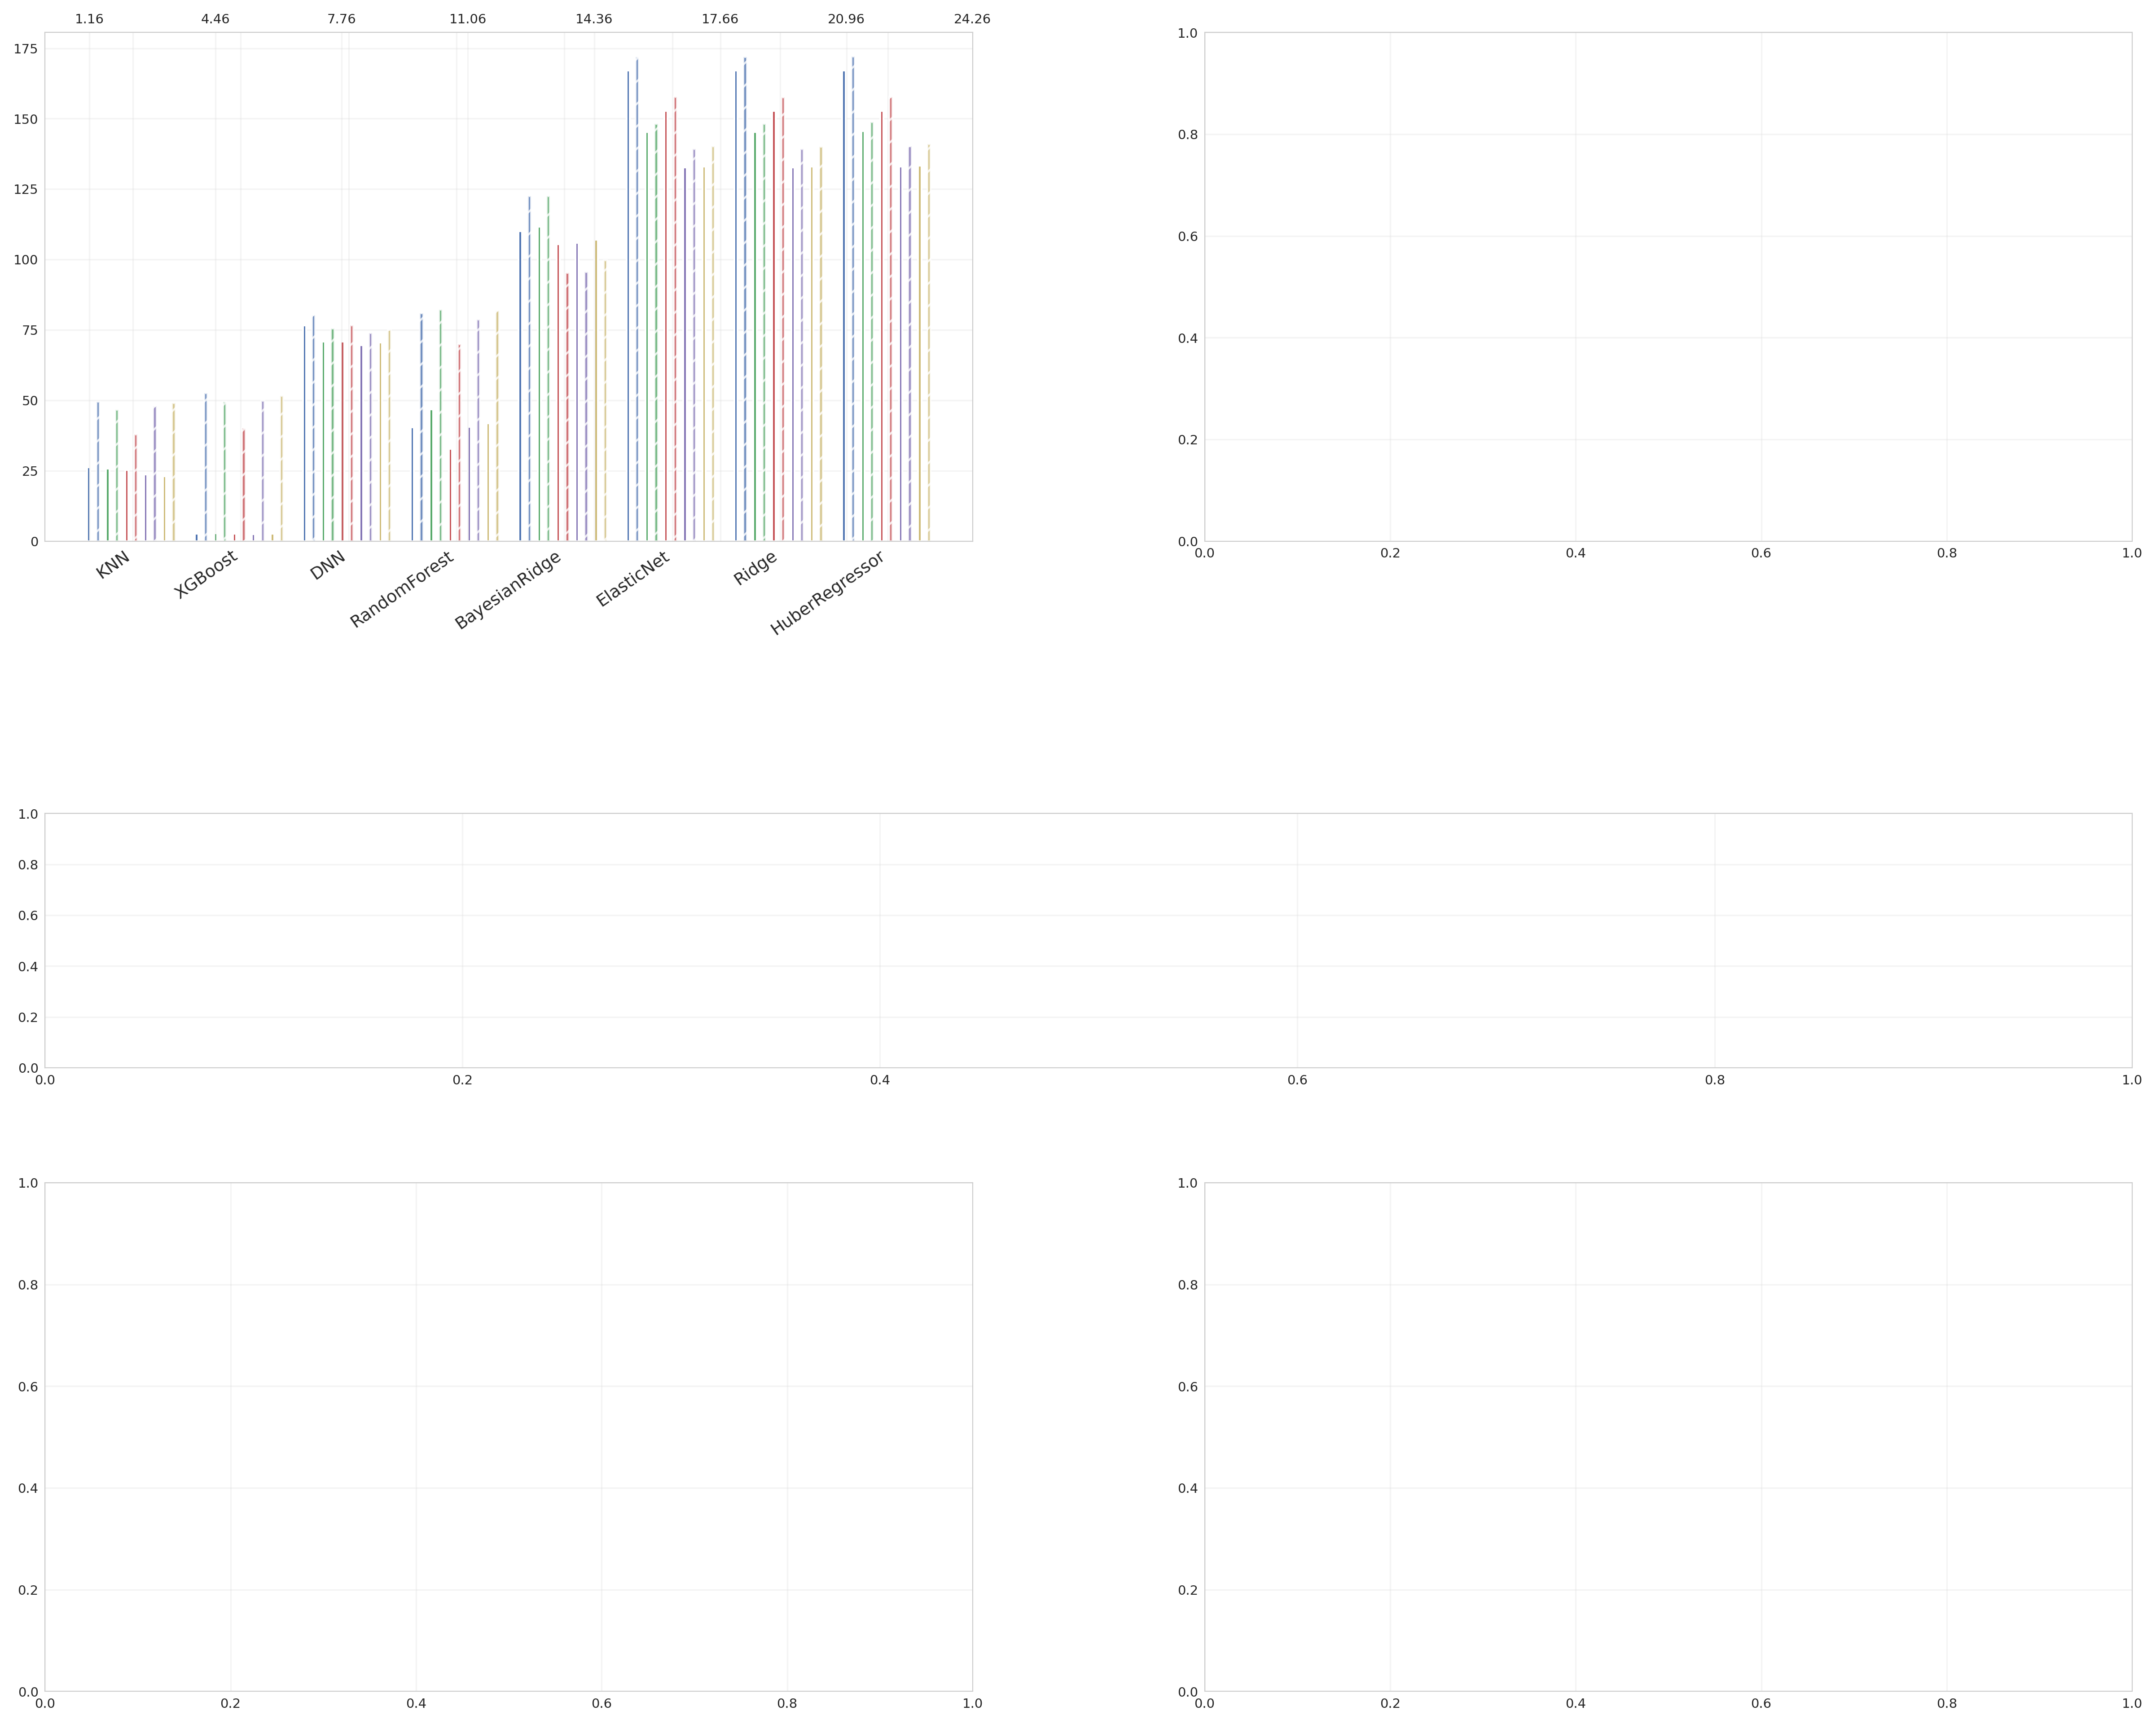

In [14]:
# =====================
# 调整主绘图逻辑（优化版）
# =====================
# 创建画布并定义高级网格系统
fig = plt.figure(figsize=(20, 16), dpi=300)
gs = fig.add_gridspec(
    nrows=4, ncols=2,
    height_ratios=[1.2, 0.1, 0.6, 1.2],  # 优化高度比例
    width_ratios=[1, 1],
    hspace=0.35,  # 纵向间距
    wspace=0.25   # 横向间距
)

# 分配子图位置
ax1 = fig.add_subplot(gs[0, 0])  # MSE (Row 0)
ax2 = fig.add_subplot(gs[0, 1])  # MAE (Row 0)
ax3 = fig.add_subplot(gs[3, 0])  # R²  (Row 3)
ax4 = fig.add_subplot(gs[3, 1])  # MAPE高量级 (Row 3)
ax5 = fig.add_subplot(gs[2, :])  # MAPE低量级 (Row 2)

# 绘制常规指标（带防重叠机制）
metric_config = {
    'MSE': {'ax': ax1, 'log_scale': True},
    'MAE': {'ax': ax2, 'log_scale': True}, 
    'R2': {'ax': ax3, 'log_scale': False}
}

for metric, config in metric_config.items():
    ax = config['ax']
    plot_lag_grouped_bars(ax, metric)
    
    # 动态调整刻度
    if config['log_scale']:
        ax.set_yscale('log')
        y_min = melt_df[melt_df.Metric == metric]['Value'].min()
        y_max = melt_df[melt_df.Metric == metric]['Value'].max()
        ax.set_ylim(max(y_min*0.8, 1e-6), y_max*2)
        
    # 添加指标标识
    ax.text(0.02, 0.95, f'({["A","B","C"][list(metric_config.keys()).index(metric)]}) {metric}',
           transform=ax.transAxes, fontsize=10, weight='bold')

# 绘制双尺度MAPE（优化布局）
plot_mape_with_dual_scale(ax4, ax5)

# =====================
# 统一图例系统（防重叠版）
# =====================
# 创建复合图例
legend_elements = [
    *[Patch(facecolor=plt.cm.viridis(i/4), label=f'Lag {i}') for i in range(5)],
    Patch(facecolor='white', edgecolor='k', hatch='', label='Train'),
    Patch(facecolor='white', edgecolor='k', hatch='//', label='Test')
]

# 智能定位图例
fig.legend(
    handles=legend_elements,
    title='Visual Guide',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),  # 放置于画布顶部外侧
    ncol=7,
    frameon=False,
    title_fontsize=10,
    fontsize=9,
    columnspacing=1.5,
    handletextpad=0.5
)

# =====================
# 高级布局优化
# =====================
# 调整子图边距
plt.subplots_adjust(
    left=0.08,
    right=0.95,
    bottom=0.08,
    top=0.92,  # 为顶部图例留出空间
    hspace=0.3,
    wspace=0.2
)

# 添加全局标题
fig.suptitle('Comprehensive Model Performance Analysis with Lag Effects', 
            y=0.98, fontsize=12, weight='bold')

# 优化保存参数
plt.savefig(
    'professional_comparison_o1.pdf',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    metadata={
        'Title': 'Model Performance Analysis',
        'Author': 'Your Name',
        'Subject': 'Machine Learning Model Comparison with Time Lags',
        'Keywords': 'Machine Learning; Time Series; Model Comparison'
    }
)
plt.close()

C:\Users\LinG\AppData\Local\Temp\ipykernel_2832\2905312948.py:198: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0, rect=[0, 0, 1, 0.97])


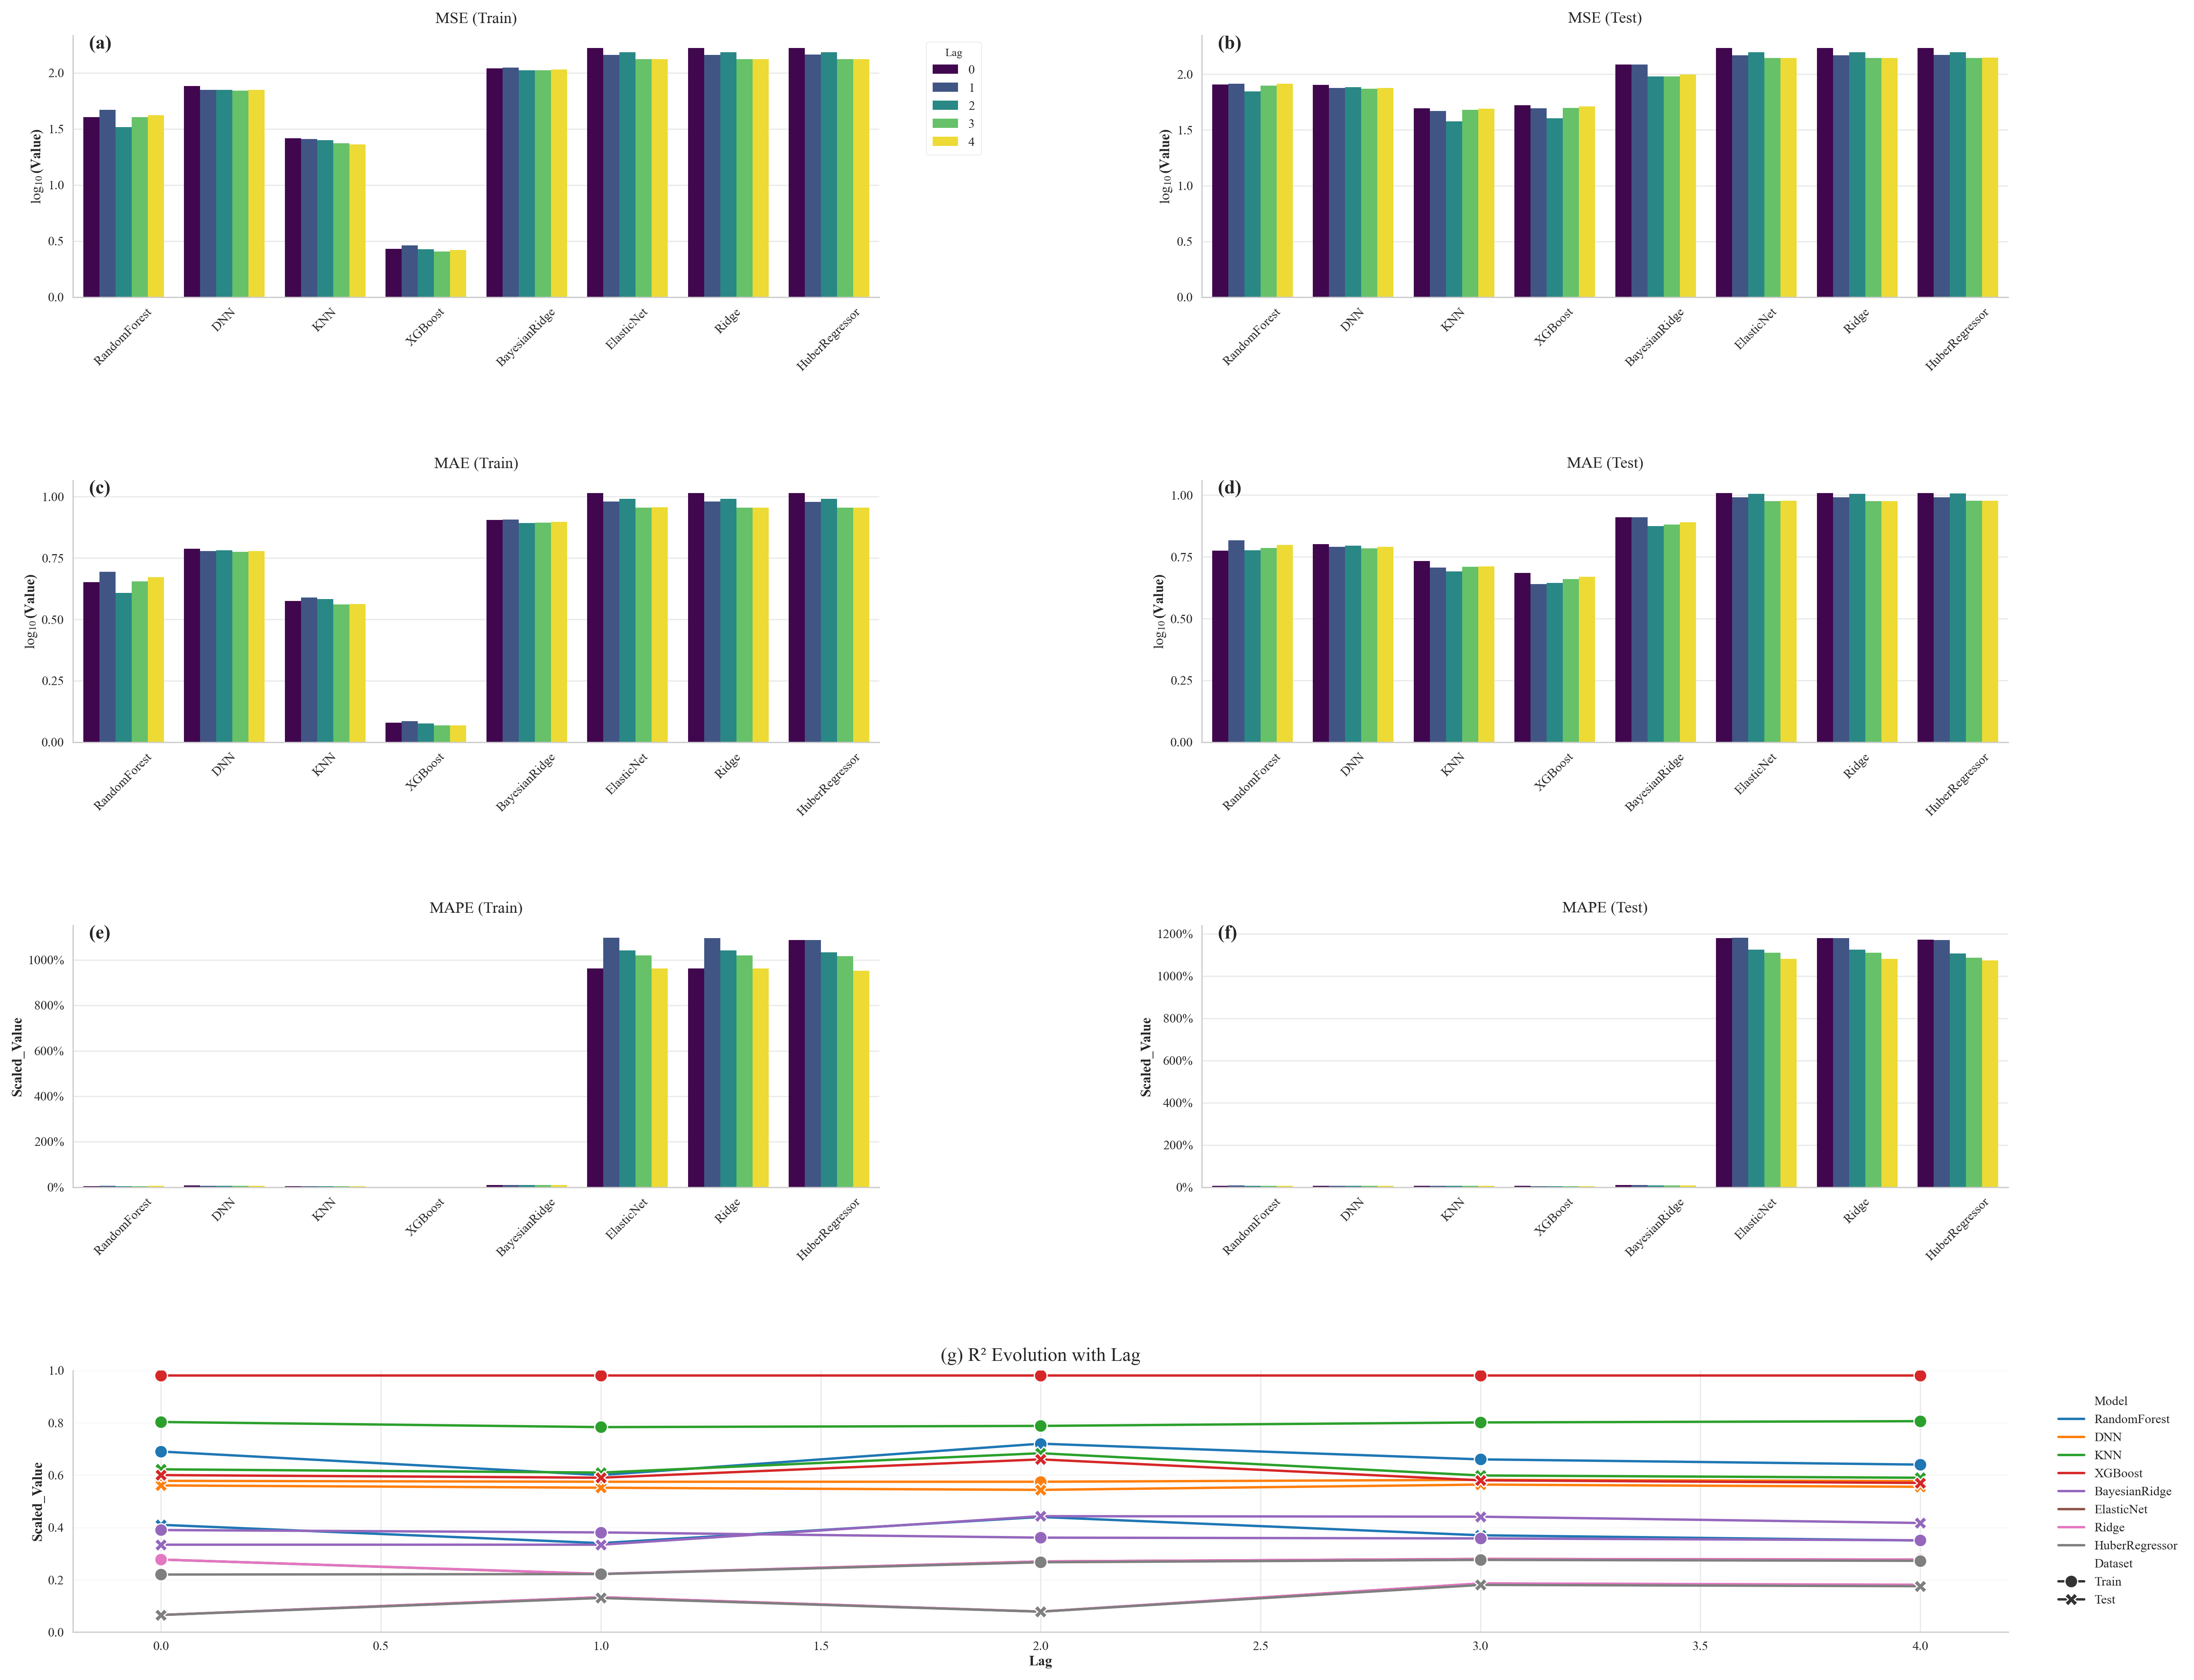

In [ ]:
from matplotlib import ticker as mticker
from packaging import version

# =====================
# 学术图表配置函数
# =====================
def set_academic_style(journal='IEEE'):
    """配置学术论文图表样式"""
    font_config = {
        'Nature': {'family': 'Helvetica', 'size': 7},
        'Science': {'family': 'Arial', 'size': 8},
        'IEEE': {'family': 'Times New Roman', 'size': 8}
    }.get(journal, {'family': 'sans-serif', 'size': 8})
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        # 字体配置
        'font.family': font_config['family'],
        'font.size': font_config['size'],
        'mathtext.fontset': 'stix',
        
        # 坐标轴配置
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.linewidth': 0.8,
        'axes.labelpad': 2,
        
        # 网格配置
        'grid.color': '#eaeaea',
        'grid.linewidth': 0.8,
        
        # 图例配置
        'legend.frameon': False,
        'legend.title_fontsize': font_config['size']-1,
        
        # 保存配置
        'savefig.dpi': 1200,
        'savefig.bbox': 'tight',
        'savefig.transparent': True
    })
    
    # 设置色盲友好色板
    sns.set_palette([
        '#0173B2',  # 蓝色
        '#DE8F05',  # 橙色
        '#029E73',  # 绿色
        '#D55E00',  # 红色
        '#CC78BC'   # 粉色
    ])

# =====================
# 数据处理
# =====================
def preprocess_data(df):
    """数据预处理流水线"""
    melt_df = pd.melt(
        df,
        id_vars=["Model", "Lag"],
        value_vars=[
            "Train_MSE", "Test_MSE",
            "Train_MAE", "Test_MAE",
            "Train_MAPE", "Test_MAPE",
            "Train_R2", "Test_R2"
        ],
        var_name="Metric_Type",
        value_name="Value"
    )
    
    # 拆分指标类型和数据集
    melt_df[["Dataset", "Metric"]] = melt_df["Metric_Type"].str.split("_", expand=True)
    metric_order = ["MSE", "MAE", "MAPE", "R2"]
    melt_df["Metric"] = pd.Categorical(melt_df["Metric"], categories=metric_order, ordered=True)
    
    # 量纲处理
    def scale_values(metric, values):
        if metric in ["MSE", "MAE"]:
            return np.log10(values + 1e-6)
        elif metric == "R2":
            return np.clip(values, 0, 1)
        return values
    
    melt_df["Scaled_Value"] = melt_df.groupby("Metric", observed=False)["Value"].transform(
        lambda x: scale_values(x.name, x))
    
    return melt_df

# =====================
# 可视化函数
# =====================
def create_performance_plot(df, journal='IEEE'):
    """创建模型性能对比图"""
    # 应用样式
    set_academic_style(journal)
    
    # 创建画布
    fig = plt.figure(figsize=(20, 18), dpi=300)
    gs = fig.add_gridspec(
        4, 2, 
        hspace=0.7, 
        wspace=0.4,
        left=0.08,
        right=0.92
    )
    
    # 初始化子图
    axes = [
        fig.add_subplot(gs[0, 0]),  # MSE-Train
        fig.add_subplot(gs[0, 1]),  # MSE-Test
        fig.add_subplot(gs[1, 0]),  # MAE-Train
        fig.add_subplot(gs[1, 1]),  # MAE-Test
        fig.add_subplot(gs[2, 0]),  # MAPE-Train
        fig.add_subplot(gs[2, 1]),  # MAPE-Test 
        fig.add_subplot(gs[3, :])    # R2-Combined
    ]
    
    # 获取版本兼容参数
    def get_barplot_params():
        if version.parse(sns.__version__) >= version.parse('0.12.0'):
            return {'err_kws': {'linewidth': 0.5}, 'capsize': 0.05}
        return {'errwidth': 0.5, 'capsize': 0.05}
    
    # 绘制前六个指标
    metric_pairs = [
        ("MSE", "Train"), ("MSE", "Test"),
        ("MAE", "Train"), ("MAE", "Test"),
        ("MAPE", "Train"), ("MAPE", "Test")
    ]
    
    for ax, (metric, dataset) in zip(axes[:6], metric_pairs):
        subset = df[(df.Metric == metric) & (df.Dataset == dataset)]
        
        sns.barplot(
            data=subset,
            x="Model",
            y="Scaled_Value",
            hue="Lag",
            palette="viridis",
            ax=ax,
            saturation=0.85,
            **get_barplot_params()
        )
        
        # 子图标注
        ax.text(0.02, 0.95, f'({chr(97+list(axes).index(ax))})', 
                transform=ax.transAxes,
                fontsize=12,
                weight='bold')
        
        # 坐标轴设置
        ax.set_title(f"{metric} ({dataset})", fontsize=10, pad=8)
        ax.set_xlabel("")
        ax.tick_params(axis="x", rotation=45, labelsize=8)
        
        # 量纲处理
        if metric in ["MSE", "MAE"]:
            ax.yaxis.set_major_locator(mticker.MaxNLocator(5))
            ax.set_ylabel(r"$\log_{10}$(Value)")
        elif metric == "MAPE":
            ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
        
        # 图例控制
        if ax != axes[0]:
            ax.get_legend().remove()
        else:
            ax.legend(title='Lag', frameon=True, 
                     facecolor='white', 
                     bbox_to_anchor=(1.05, 1),
                     borderpad=0.5)

    # 绘制R²趋势图
    r2_data = df[df.Metric == "R2"]
    sns.lineplot(
        data=r2_data,
        x="Lag",
        y="Scaled_Value",
        hue="Model",
        style="Dataset",
        markers=True,
        dashes=False,
        ax=axes[-1],
        markersize=8,
        linewidth=1.5,
        palette="tab10"
    )
    
    # R²图配置
    axes[-1].set_title(f'(g) R² Evolution with Lag', fontsize=12)
    axes[-1].set_ylim(0, 1)
    axes[-1].yaxis.set_major_locator(mticker.MultipleLocator(0.2))
    axes[-1].grid(True, axis='y', alpha=0.3)
    axes[-1].legend(
        bbox_to_anchor=(1.02, 0.5), 
        loc='center left',
        frameon=False
    )
    
    # 全局优化
    plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0, rect=[0, 0, 1, 0.97])
    
    # 保存图像
    plt.savefig("model_performance_analysis.pdf",
           format='pdf',
           bbox_inches='tight',
           pad_inches=0.1,
           metadata={
               'Title': 'Model Performance Analysis',
               'Author': 'Your Name',
               'Subject': 'Machine Learning Model Comparison'
           })

    # 可选保存高分辨率位图
    plt.savefig("model_performance_analysis.tif",
           dpi=1200,
           pil_kwargs={"compression": "tiff_lzw"})
    
    plt.close()

# =====================
# 主程序
# =====================
if __name__ == "__main__":
    # 假设 full_combined_no_features 是已加载的DataFrame
    processed_df = preprocess_data(full_combined_no_features)
    create_performance_plot(processed_df, journal='IEEE')

### deprecated

In [16]:
# Set global styles
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")  # Use a more distinguishable color palette
plt.rcParams['font.sans-serif'] = ['Arial']  # Use a standard English font
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display correctly


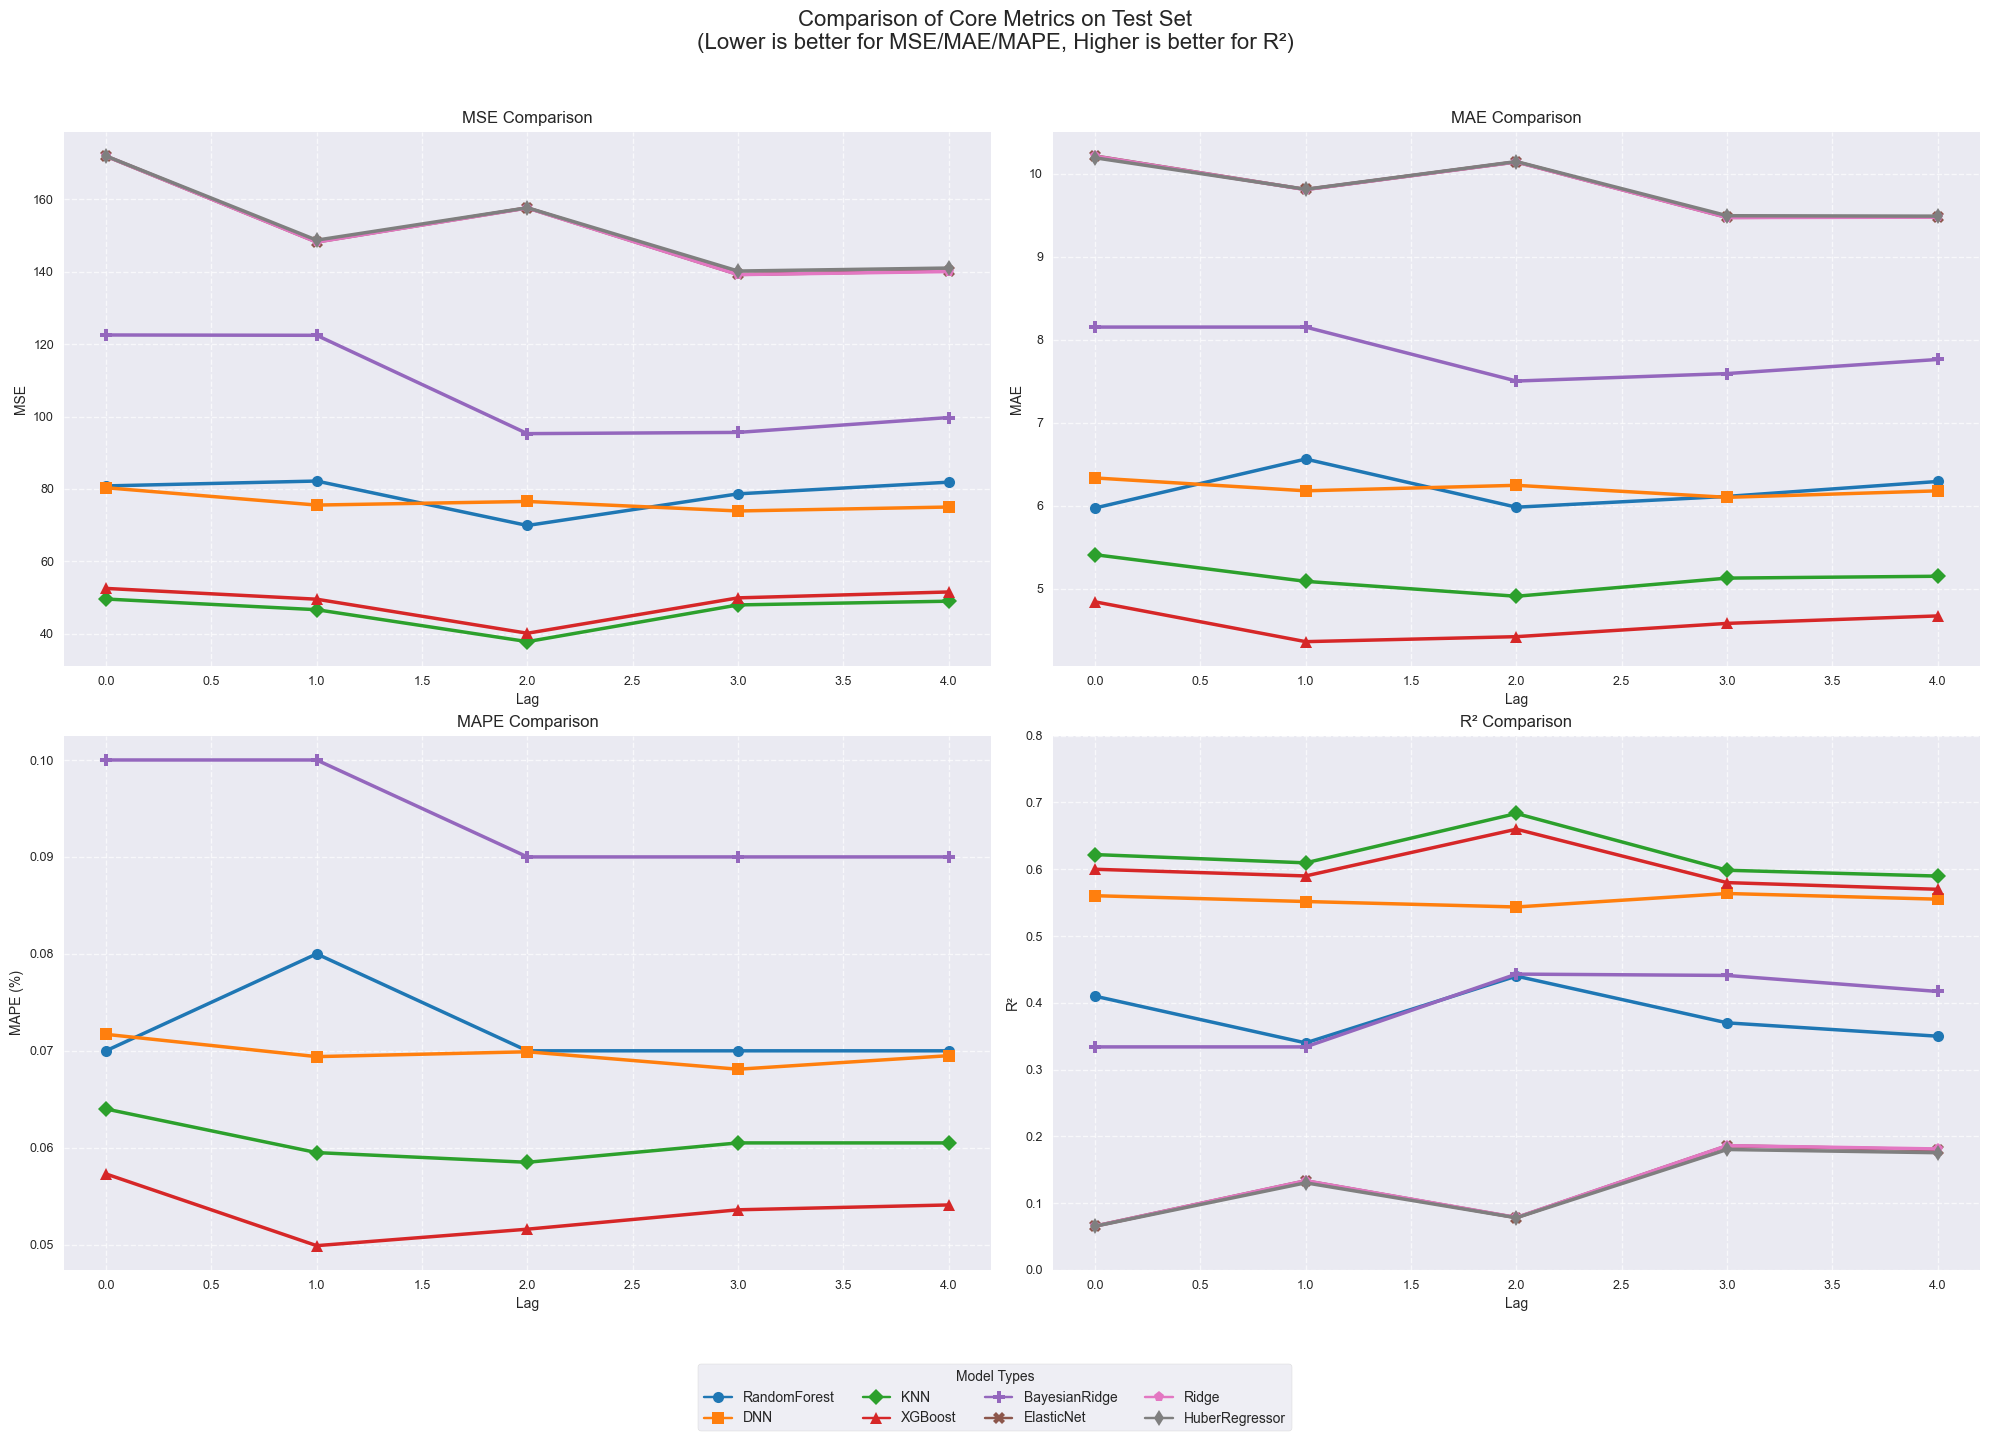

In [ ]:
import matplotlib.lines as mlines

# ================== 样式配置 ==================
# 为每个模型分配独特的标记和颜色
model_styles = {
    'RandomForest':    {'color': '#1f77b4', 'marker': 'o'},
    'DNN':             {'color': '#ff7f0e', 'marker': 's'},
    'KNN':             {'color': '#2ca02c', 'marker': 'D'},
    'XGBoost':         {'color': '#d62728', 'marker': '^'},
    'BayesianRidge':   {'color': '#9467bd', 'marker': 'P'},
    'ElasticNet':      {'color': '#8c564b', 'marker': 'X'},
    'Ridge':           {'color': '#e377c2', 'marker': 'p'},
    'HuberRegressor':  {'color': '#7f7f7f', 'marker': 'd'}
}

# ================== 图表绘制 ==================
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('Comparison of Core Metrics on Test Set\n(Lower is better for MSE/MAE/MAPE, Higher is better for R²)', 
            y=1.02, fontsize=16)

# 绘制所有子图
def plot_subplot(ax, y_col, title, ylabel, marker_cycle):
    for model, style in model_styles.items():
        df = full_combined[full_combined['Model'] == model]
        ax.plot(df['Lag'], df[y_col], 
               label=model,
               color=style['color'],
               marker=style['marker'],
               markersize=8,
               linewidth=2.5,
               linestyle='-')
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Lag', fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', labelsize=9)

# 子图1: MSE
plot_subplot(axes[0,0], 'Test_MSE', 'MSE Comparison', 'MSE', model_styles)

# 子图2: MAE
plot_subplot(axes[0,1], 'Test_MAE', 'MAE Comparison', 'MAE', model_styles)

# 子图3: MAPE
plot_subplot(axes[1,0], 'Test_MAPE', 'MAPE Comparison', 'MAPE (%)', model_styles)

# 子图4: R²
plot_subplot(axes[1,1], 'Test_R2', 'R² Comparison', 'R²', model_styles)
axes[1,1].set_ylim(0.0, 0.8)

# ================== 统一图例 ==================
handles = []
for model, style in model_styles.items():
    handles.append(
        mlines.Line2D([], [],
                     color=style['color'],
                     marker=style['marker'],
                     linestyle='-',
                     markersize=8,
                     label=model)
    )

fig.legend(handles=handles,
          loc='lower center',
          ncol=4,
          bbox_to_anchor=(0.5, 0),
          frameon=True,
          fontsize=10,
          title="Model Types")

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.savefig('test_set_core_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

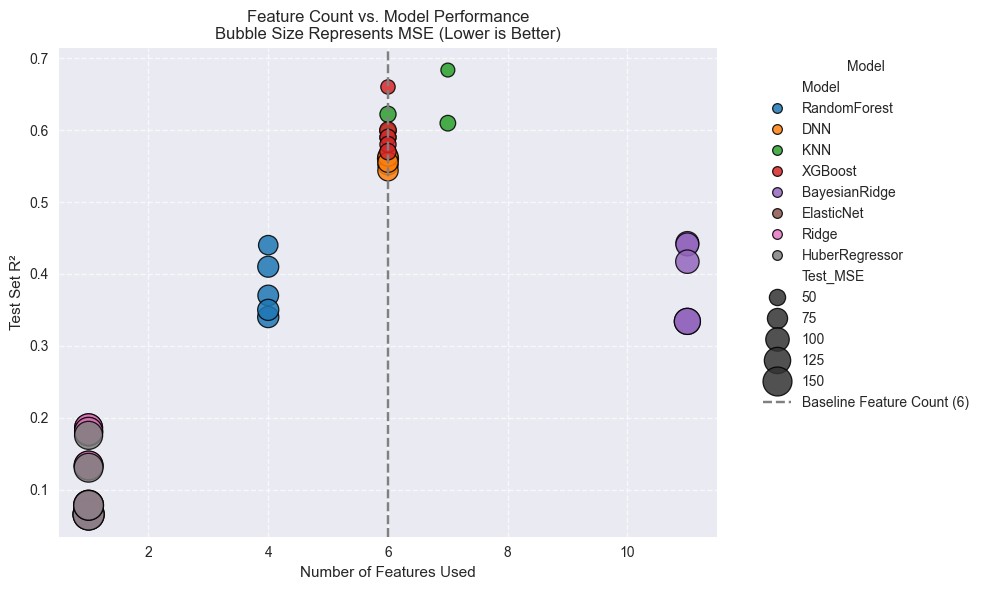

In [ ]:
# ================== 图表2：特征数量与模型性能 ==================
# Compute feature count
full_combined['Feature_Count'] = full_combined['Features'].apply(len)

# Set up the figure
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(data=full_combined, x='Feature_Count', y='Test_R2', 
                hue='Model', size='Test_MSE', palette='tab10', 
                sizes=(100, 500), alpha=0.85, edgecolor='black')

# Titles and labels
plt.title('Feature Count vs. Model Performance\nBubble Size Represents MSE (Lower is Better)')
plt.xlabel('Number of Features Used')
plt.ylabel('Test Set R²')

# Reference line for baseline feature count
plt.axvline(x=6, color='gray', linestyle='--', label='Baseline Feature Count (6)')

# Improve legend positioning and readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

# Grid and layout adjustments
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# save figure
plt.savefig('feature_count_vs_model_performance.png', dpi=300, bbox_inches='tight')



C:\Users\LinG\AppData\Local\Temp\ipykernel_18216\2603012426.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rank_df = full_combined.groupby('Lag', group_keys=False).apply(


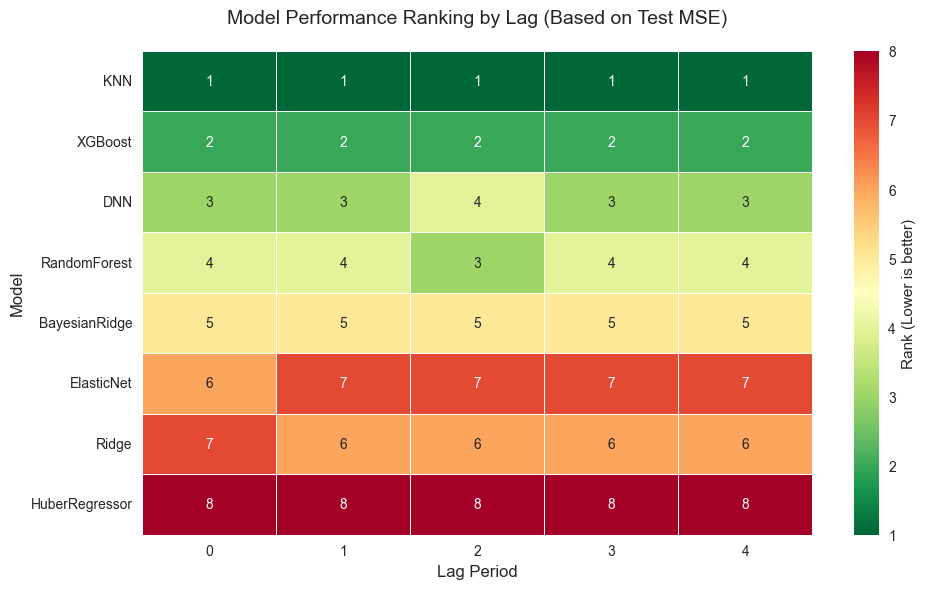

In [ ]:
# ================== 图表3：模型排名热力图 ==================
# 计算整数排名 (method='min'处理并列情况)
rank_df = full_combined.groupby('Lag', group_keys=False).apply(
    lambda x: x.assign(Rank=x['Test_MSE'].rank(method='min', ascending=True).astype(int))
)

# 按Lag 0的排名排序模型
lag0_ranking = rank_df[rank_df['Lag'] == 0].sort_values('Rank')[['Model', 'Rank']]
model_order = lag0_ranking['Model'].tolist()

# 转换数据格式并排序
heatmap_data = (
    rank_df.pivot(index='Model', columns='Lag', values='Rank')
    .reindex(model_order)  # 按Lag 0排名排序
    .sort_values(0, ascending=True)  # 确保按升序排列
)

# 设置图形
plt.figure(figsize=(10, 6))

# 创建热力图 (优化颜色映射)
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='RdYlGn_r',  # 红色(差) -> 绿色(优)
    fmt="d",          # 整数格式
    linewidths=0.5,
    cbar_kws={'label': 'Rank (Lower is better)'},
    vmin=1,           # 固定颜色范围
    vmax=len(heatmap_data)
)

# 优化标签
plt.title('Model Performance Ranking by Lag (Based on Test MSE)', fontsize=14, pad=20)
plt.xlabel('Lag Period', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# 调整布局
plt.tight_layout()
plt.savefig('model_ranking_heatmap.png', dpi=300, bbox_inches='tight')

In [17]:
# ================== 图表4：过拟合分析 ==================

# 自定义颜色映射 (增强颜色对比)
model_colors = {
    'RandomForest': '#1f77b4',
    'DNN': '#ff7f0e',
    'KNN': '#2ca02c',
    'XGBoost': '#d62728',
    'ElasticNet': '#9467bd',
    'Ridge': '#e377c2',
    'HuberRegressor': '#8c564b',
    'BayesianRidge': '#bcbd22'
}

# ============== 1. 计算所有指标的差值列 ==============
metrics = ['MSE', 'MAE', 'MAPE', 'R2']

for metric in metrics:
    full_combined[f'{metric}_diff'] = full_combined[f'Test_{metric}'] - full_combined[f'Train_{metric}']


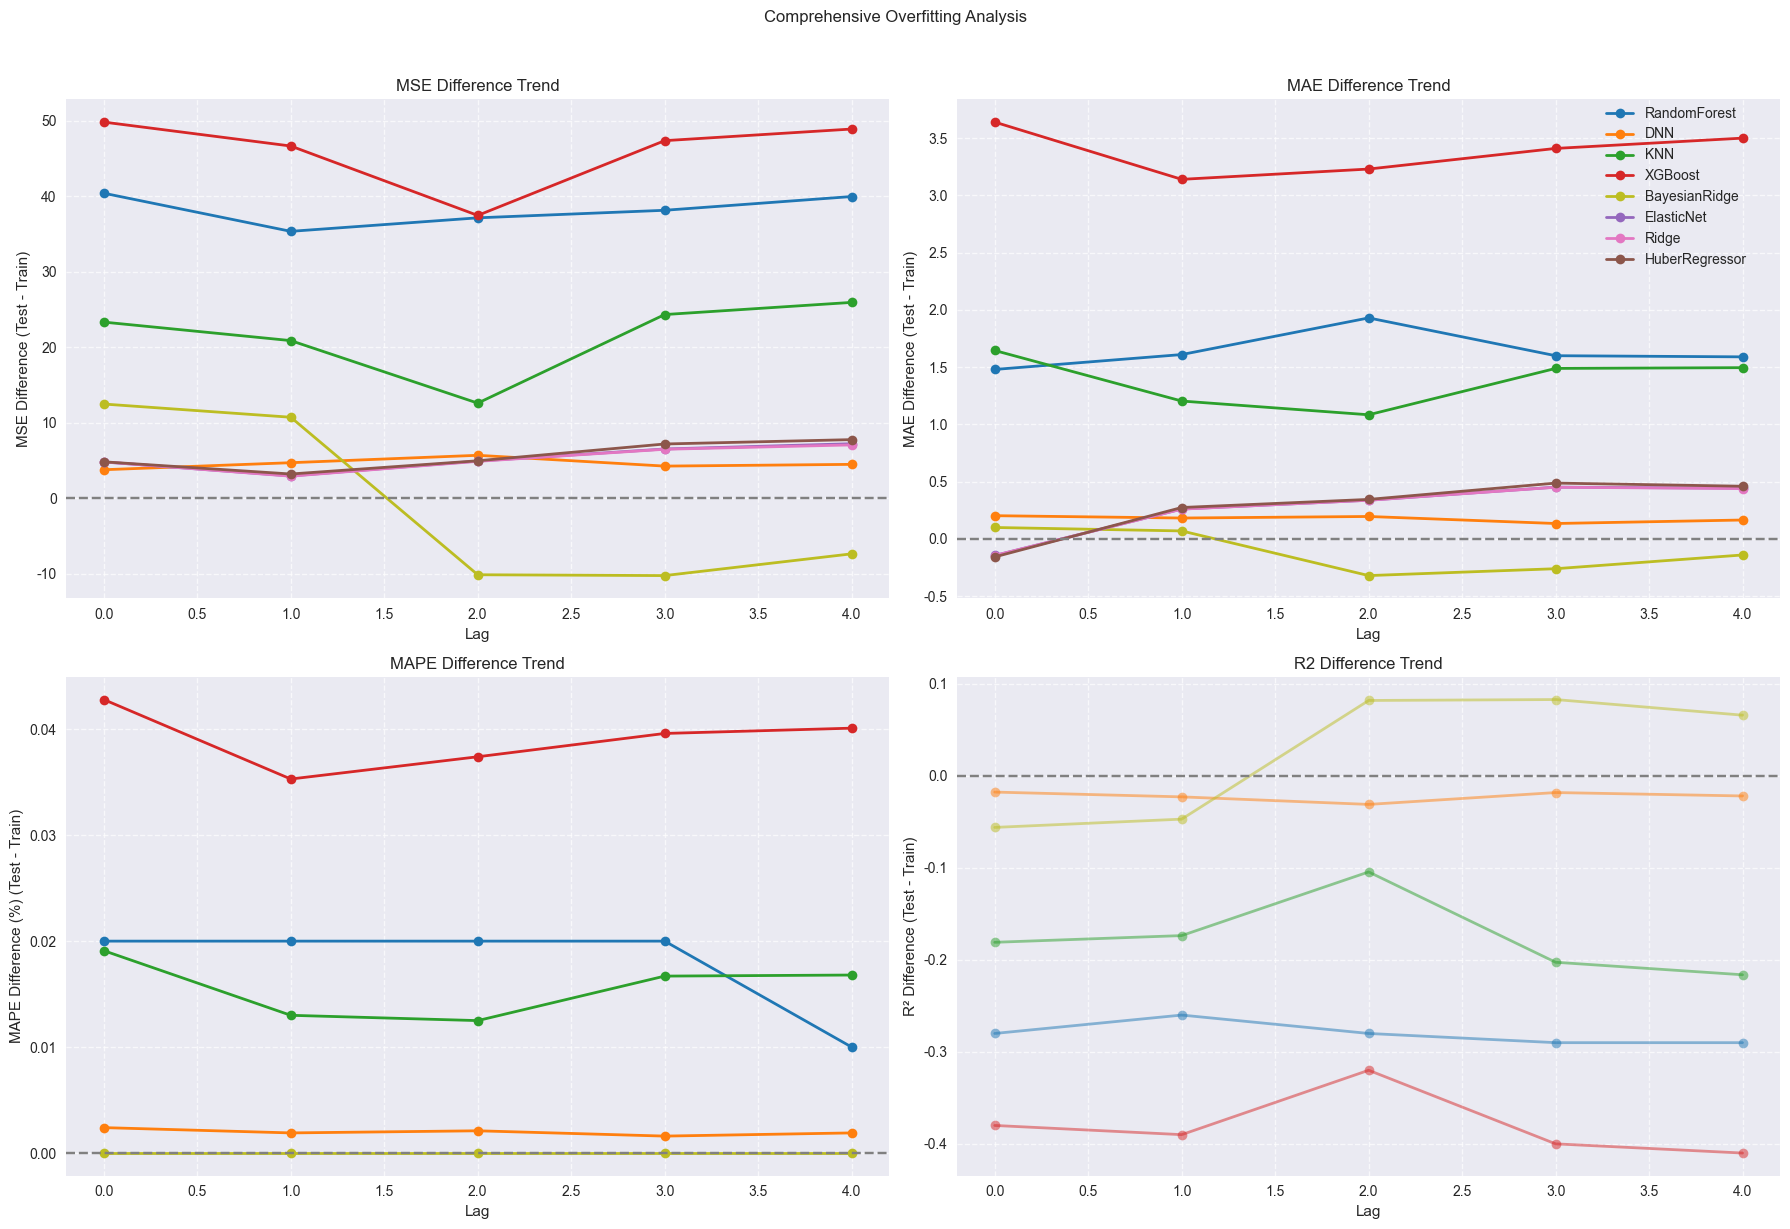

In [ ]:

# ============== 2. 综合过拟合对比图 ==============
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Comprehensive Overfitting Analysis', y=1.02)

# 统一绘图函数
def plot_metric_diff(ax, metric, ylabel, color_map):
    for model in full_combined['Model'].unique():
        subset = full_combined[full_combined['Model'] == model]
        ax.plot(subset['Lag'], subset[f'{metric}_diff'], 
                marker='o', linewidth=2, label=model,
                color=color_map.get(model, 'gray'))
    ax.set_title(f'{metric} Difference Trend')
    ax.set_xlabel('Lag')
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(0, color='gray', linestyle='--')

# 子图参数配置
metric_config = {
    'MSE': ('MSE Difference (Test - Train)', model_colors),
    'MAE': ('MAE Difference (Test - Train)', model_colors),
    'MAPE': ('MAPE Difference (%) (Test - Train)', model_colors),
    'R2': ('R² Difference (Test - Train)', {k: v+'80' for k, v in model_colors.items()})  # 半透明色
}

for idx, metric in enumerate(metrics):
    row, col = divmod(idx, 2)
    plot_metric_diff(
        ax=axes[row][col],
        metric=metric,
        ylabel=metric_config[metric][0],
        color_map=metric_config[metric][1]
    )

# 统一图例
lines, labels = axes[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.98, 0.95))
plt.tight_layout()

# save figure
plt.savefig('comprehensive_overfitting_analysis.png', dpi=300, bbox_inches='tight')


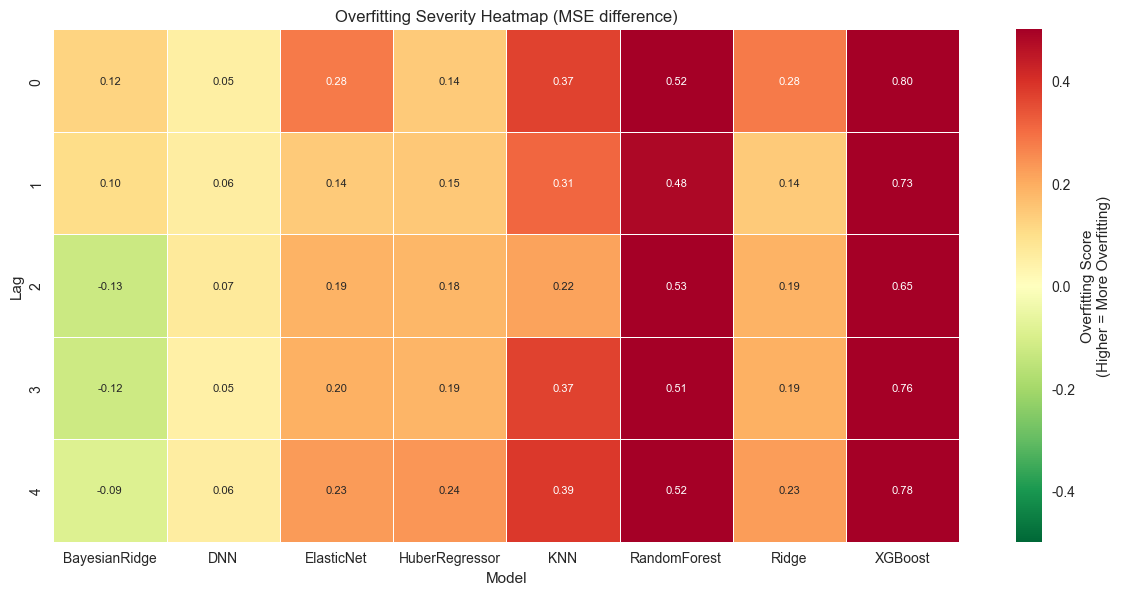

In [18]:

# ============== 3. 过拟合程度热力图 ==============
plt.figure(figsize=(12, 6))

# 计算综合过拟合评分
full_combined['Overfit_Score'] = (
    0.4 * full_combined['MSE_diff'].fillna(0) / full_combined['MSE_diff'].abs().max() +
    0.3 * full_combined['MAE_diff'].fillna(0) / full_combined['MAE_diff'].abs().max() +
    0.2 * full_combined['MAPE_diff'].fillna(0) / full_combined['MAPE_diff'].abs().max() -
    0.1 * full_combined['R2_diff'].fillna(0) / full_combined['R2_diff'].abs().max()
)

# 转换为宽表
heatmap_data = full_combined.pivot_table(
    index='Model',
    columns='Lag',
    values='Overfit_Score',
    aggfunc='mean',
    fill_value=0  # 关键修改：填充缺失值
)

# 按模型名称排序
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.index, key=lambda x: x.lower()))

# 绘制热力图
sns.heatmap(
    heatmap_data.T,  # Lag 作为 x 轴
    annot=True,
    cmap='RdYlGn_r',
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Overfitting Score\n(Higher = More Overfitting)'},
    vmin=-0.5, 
    vmax=0.5
)

plt.title('Overfitting Severity Heatmap (MSE difference)')
plt.xlabel('Model')
plt.ylabel('Lag')
plt.tight_layout()\

# save figure
plt.savefig('overfitting_severity_heatmap.pdf', dpi=300, bbox_inches='tight')


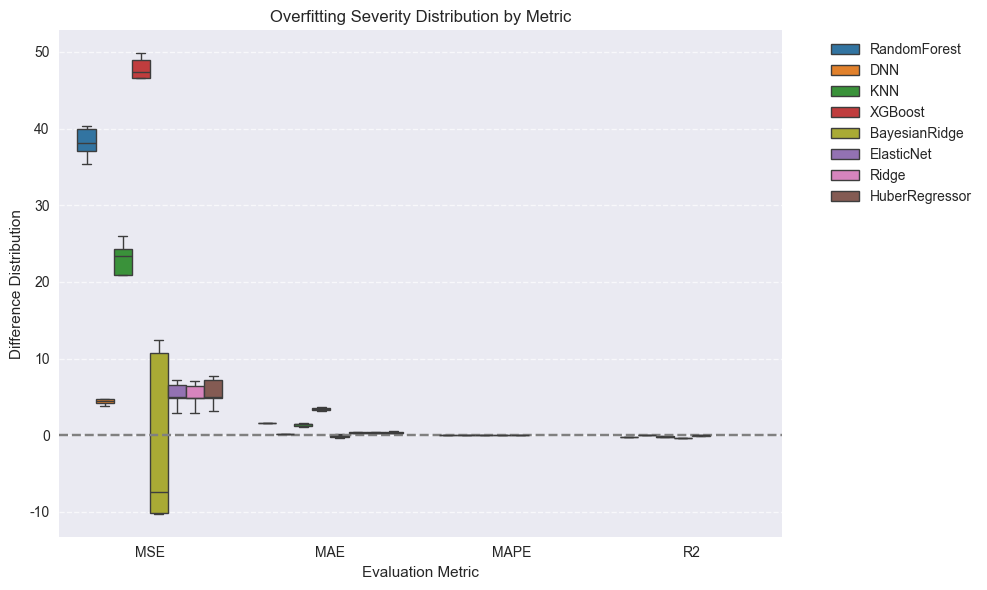

In [ ]:

# ============== 4. 指标对比箱线图 ==============
plt.figure(figsize=(10, 6))

# 转换为长格式
melt_df = full_combined.melt(
    id_vars=['Model'],
    value_vars=[f'{metric}_diff' for metric in metrics],
    var_name='Metric',
    value_name='Difference'
)

# 美化标签
melt_df['Metric'] = melt_df['Metric'].str.replace('_diff', '').str.upper()

# 绘制箱线图
sns.boxplot(
    x='Metric',
    y='Difference',
    hue='Model',
    data=melt_df,
    palette=model_colors,
    showfliers=False,
    linewidth=1
)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Overfitting Severity Distribution by Metric')
plt.xlabel('Evaluation Metric')
plt.ylabel('Difference Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# plt.show()

# save figure
plt.savefig('overfitting_severity_boxplot.png', dpi=300, bbox_inches='tight')
